# Bootcamp Prep – Unit 2, Lesson 4
## Challenge - What Do You See? (Chocolate Bars)

This notebook will analyze a "Chocolate Bar Ratings" dataset found on [Kaggle](https://www.kaggle.com/rtatman/chocolate-bar-ratings) using Python libraries such as `numpy`, `pandas`, and `matplotlib`.

First, import the necessary modules and ensure you can render `matplotlib` plots inline inside this Jupyter Notebook:

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

%matplotlib inline

Then, import the CSV data from the external `flavors_of_cacao.csv` file and take a look at the data.

In [237]:
choc_csv_data = pd.read_csv('flavors_of_cacao.csv')
choc_df = pd.DataFrame(choc_csv_data)

choc_df

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


Next, I will revise the column names to be more succinct and reorder them so that related columns (i.e. those pertaining to location) are adjacent to each other.

In [238]:
# remove newlines from column names
choc_df.columns = ["Company", "Specific Bean Origin or Bar Name", "REF", "Review Date", "Cocoa Percent", "Location", "Rating", "Bean Type", "Broad Bean Origin"]

print('indices: {}'.format(choc_df.index))
print('columns: {}'.format(choc_df.columns))

# rearrange columns
cols = choc_df.columns.tolist()
cols = cols[0:1] + cols[2:5] + cols[6:8] + cols[5:6] + cols[1:2] + cols[8:9]
choc_df = choc_df[cols]

choc_df

indices: RangeIndex(start=0, stop=1795, step=1)
columns: Index(['Company', 'Specific Bean Origin or Bar Name', 'REF', 'Review Date',
       'Cocoa Percent', 'Location', 'Rating', 'Bean Type',
       'Broad Bean Origin'],
      dtype='object')


,Company,REF,Review Date,Cocoa Percent,Rating,Bean Type,Location,Specific Bean Origin or Bar Name,Broad Bean Origin
0,A. Morin,1876,2016,63%,3.75,,France,Agua Grande,Sao Tome
1,A. Morin,1676,2015,70%,2.75,,France,Kpime,Togo
2,A. Morin,1676,2015,70%,3.00,,France,Atsane,Togo
3,A. Morin,1680,2015,70%,3.50,,France,Akata,Togo
4,A. Morin,1704,2015,70%,3.50,,France,Quilla,Peru
5,A. Morin,1315,2014,70%,2.75,Criollo,France,Carenero,Venezuela
6,A. Morin,1315,2014,70%,3.50,,France,Cuba,Cuba
7,A. Morin,1315,2014,70%,3.50,Criollo,France,Sur del Lago,Venezuela
8,A. Morin,1319,2014,70%,3.75,Criollo,France,Puerto Cabello,Venezuela
9,A. Morin,1319,2014,70%,4.00,,France,Pablino,Peru


Now, I want to clean the data so that values in the `Cocoa Percent` column are integers, not strings. This will allow for numerical operations to be called on that data, such as getting the average of the percents.

In [239]:
choc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [240]:
choc_df['Cocoa Percent'] = choc_df['Cocoa Percent'].apply(lambda x: float(x.strip("%"))/100)
choc_df

,Company,REF,Review Date,Cocoa Percent,Rating,Bean Type,Location,Specific Bean Origin or Bar Name,Broad Bean Origin
0,A. Morin,1876,2016,0.63,3.75,,France,Agua Grande,Sao Tome
1,A. Morin,1676,2015,0.70,2.75,,France,Kpime,Togo
2,A. Morin,1676,2015,0.70,3.00,,France,Atsane,Togo
3,A. Morin,1680,2015,0.70,3.50,,France,Akata,Togo
4,A. Morin,1704,2015,0.70,3.50,,France,Quilla,Peru
5,A. Morin,1315,2014,0.70,2.75,Criollo,France,Carenero,Venezuela
6,A. Morin,1315,2014,0.70,3.50,,France,Cuba,Cuba
7,A. Morin,1315,2014,0.70,3.50,Criollo,France,Sur del Lago,Venezuela
8,A. Morin,1319,2014,0.70,3.75,Criollo,France,Puerto Cabello,Venezuela
9,A. Morin,1319,2014,0.70,4.00,,France,Pablino,Peru


Let's look at cocoa percentages via several aggregates. 

First, let's see how `Cocoa Percent` differs across companies in different locations:

In [252]:
cocoa_percent_by_location = choc_df.groupby('Location')['Cocoa Percent']
cocoa_percent_by_location.describe()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Amsterdam,4.0,0.732500,5.377422e-02,0.680,0.69500,0.725,0.7625,0.80
Argentina,9.0,0.733333,6.403124e-02,0.700,0.70000,0.700,0.7200,0.88
Australia,49.0,0.702245,3.607084e-02,0.640,0.68000,0.700,0.7200,0.83
Austria,26.0,0.720000,7.838367e-02,0.580,0.65750,0.700,0.7575,0.90
Belgium,40.0,0.720250,5.837489e-02,0.600,0.70000,0.720,0.7400,0.88
Bolivia,2.0,0.730000,2.828427e-02,0.710,0.72000,0.730,0.7400,0.75
Brazil,17.0,0.698235,9.773915e-02,0.500,0.65000,0.700,0.7500,0.85
Canada,125.0,0.723520,6.043199e-02,0.620,0.70000,0.700,0.7300,1.00
Chile,2.0,0.700000,0.000000e+00,0.700,0.70000,0.700,0.7000,0.70


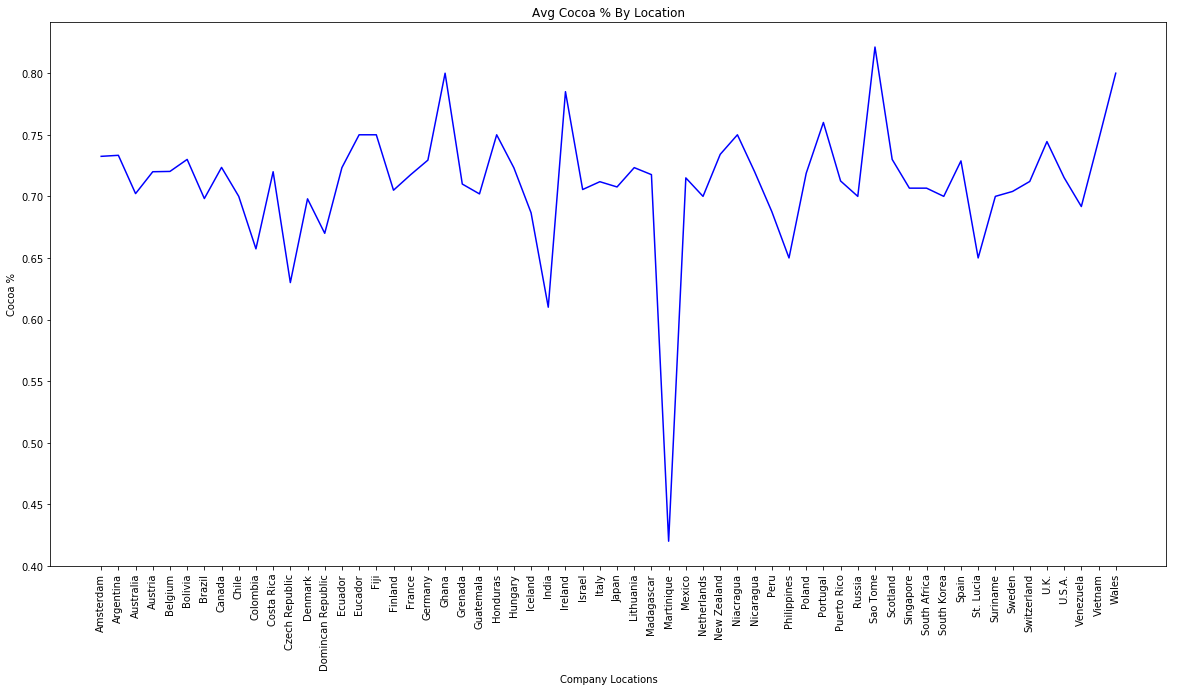

In [251]:
# FIGURE #1 – Avg Cocoa % By Location
plt.figure(figsize=(20,10))

avg_cocoa_percent_by_location = cocoa_percent_by_location.mean()
plt.plot(avg_cocoa_percent_by_location, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Company Locations')
plt.ylabel('Cocoa %')
plt.title('Avg Cocoa % By Location')
plt.show()

Next, let's see how `Cocoa Percent` differs across `Rating`s:

In [253]:
cocoa_percent_by_rating = choc_df.groupby('Rating')['Cocoa Percent']
cocoa_percent_by_rating.describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1.00,4.0,0.782500,0.145688,0.70,0.700,0.715,0.7975,1.00
1.50,10.0,0.848000,0.153101,0.65,0.700,0.880,1.0000,1.00
1.75,3.0,0.906667,0.161658,0.72,0.860,1.000,1.0000,1.00
2.00,32.0,0.766250,0.118805,0.53,0.700,0.750,0.8125,1.00
2.25,14.0,0.740000,0.099383,0.55,0.705,0.725,0.7575,1.00
2.50,127.0,0.717913,0.070284,0.55,0.700,0.710,0.7500,1.00
2.75,259.0,0.721795,0.072325,0.42,0.700,0.700,0.7500,1.00
3.00,341.0,0.717742,0.064323,0.55,0.700,0.700,0.7500,1.00
3.25,303.0,0.714125,0.058884,0.55,0.700,0.700,0.7500,0.99


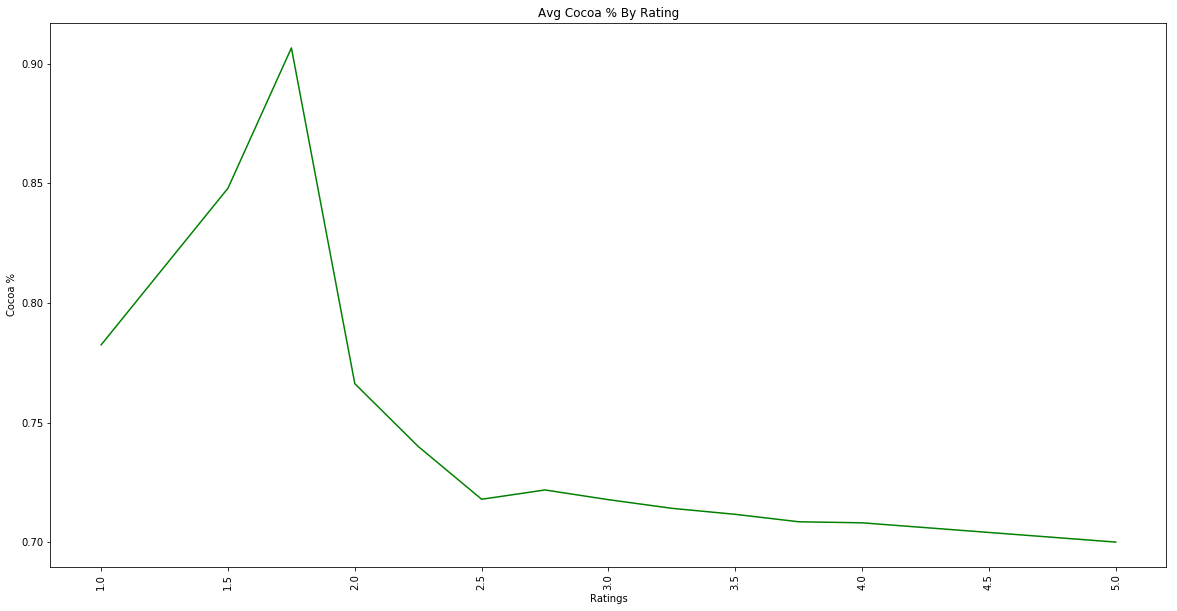

In [254]:
# FIGURE #2 – Avg Cocoa % By Rating
plt.figure(figsize=(20,10))

avg_cocoa_percent_by_rating = cocoa_percent_by_rating.mean()
plt.plot(avg_cocoa_percent_by_rating, color='green')
plt.xticks(rotation=90)
plt.xlabel('Ratings')
plt.ylabel('Cocoa %')
plt.title('Avg Cocoa % By Rating')
plt.show()

We see that on average, companies located in Martinique produce chocolate bars with the lowest cocoa percentage, and those in Russia produce ars with the highest. We also see that chocolate bars rated the highest have, on average, the lowest cocoa percentages, and that chocolate bars rated around 1.75 have, on average, the highest cocoa percentage (i.e. apart from chocoate bars rated from 1 to 1.75, more highly rated chocolate bars have lower cooca percentages).

Now, let's look at the distribution of cocoa percentages across all companies' chocolate bars.

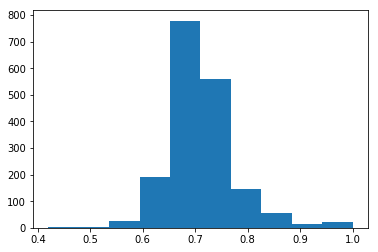

Mean:  0.7169832869080895
Median:  0.7
Mode:  0.7


Variance:  0.003998182552177948
Standard Deviation:  0.06323118338429187
Standard Error:  3.522628600796205e-05


In [242]:
plt.hist(choc_df['Cocoa Percent'])
plt.show()

cocoa_data = choc_df['Cocoa Percent']
print('Mean: ', cocoa_data.mean())
print('Median: ', cocoa_data.median())
print('Mode: ', statistics.mode(cocoa_data))

print('\n')
print('Variance: ', cocoa_data.var())
print('Standard Deviation: ', np.std(cocoa_data, ddof = 1 ))
print('Standard Error: ', np.std(cocoa_data, ddof = 1 )/len(cocoa_data))

From the above, we can see that the cocoa percentages have a roughly normal distribution, with the average, median, and mode all hovering around 0.7. 

Considering the small variance, we can deduce that our values do not deviate far from our sample mean ("central tendency"). Considering the very small standard error, we can feel confident about the precision of our sample mean estimate.